# Bank marketing analysis

## Data loading

In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn import preprocessing


warnings.filterwarnings('ignore')
import os

In [2]:
data=pd.read_csv("bank-full.csv",sep=';')
print(data.shape)
data.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
# "day" là biến số, tuy nhiên nó là biến phân loại, không phải biến liên tục
data["day"] = data["day"].astype(str)

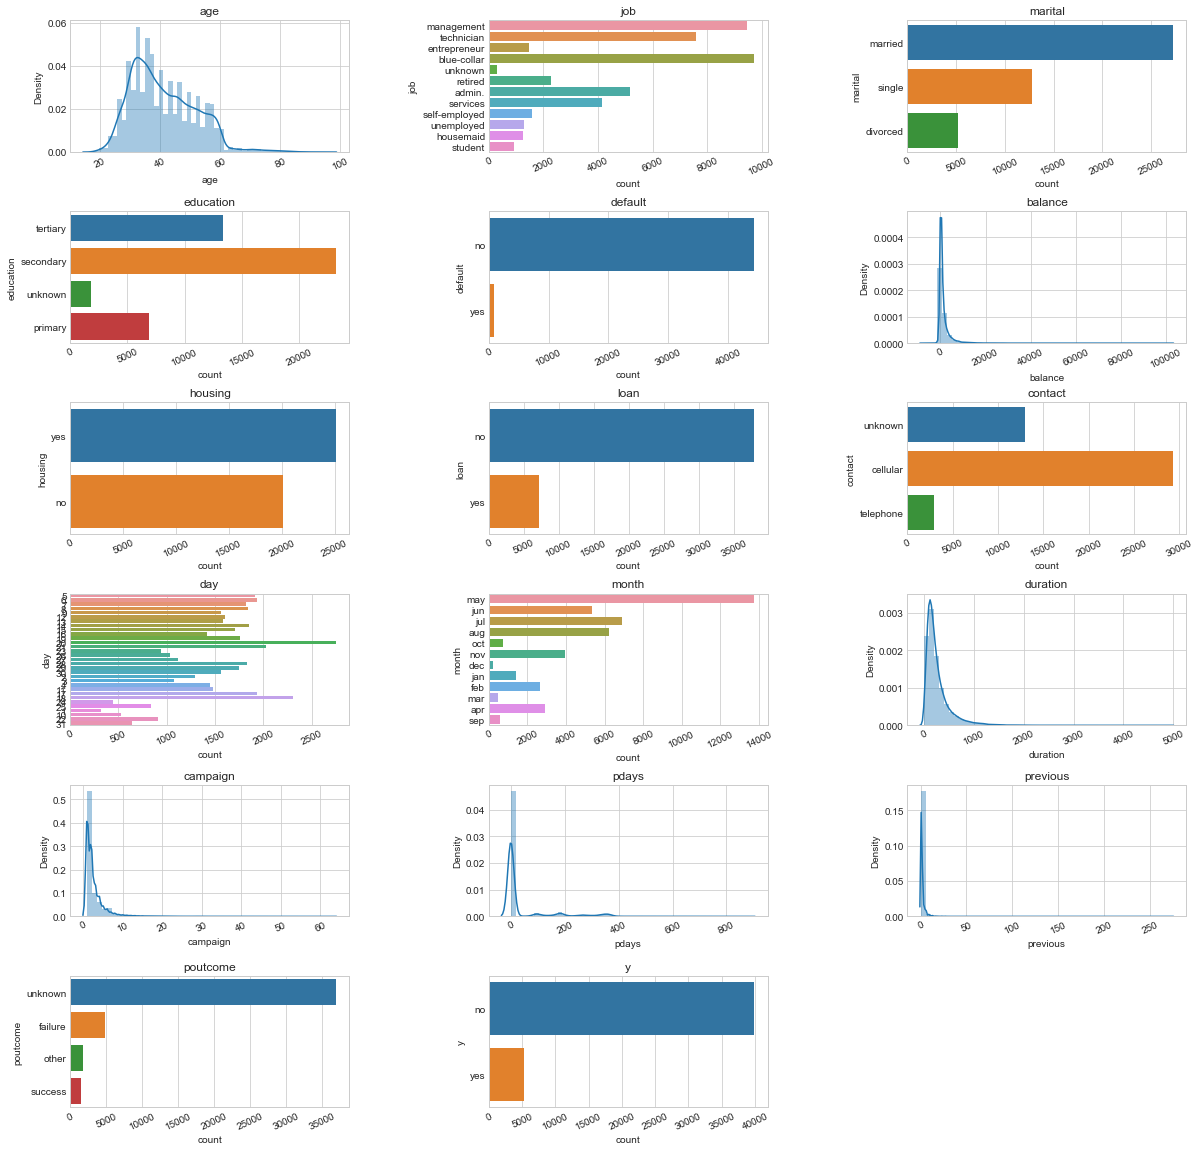

In [5]:
import math
# Let’s plot the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(data, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

# EDA

## Feature: y

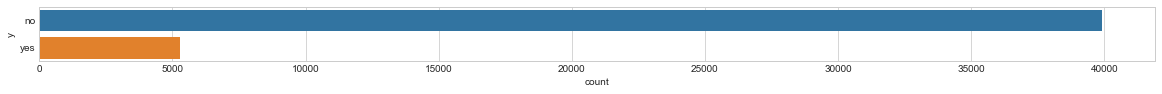

In [6]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,1)) 
sns.countplot(y="y", data=data);

## Feature: Job

In [7]:
def countplot(label, dataset):
  plt.figure(figsize=(15,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [8]:
%matplotlib inline

def countplot_withY(label, dataset):
  plt.figure(figsize=(20,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

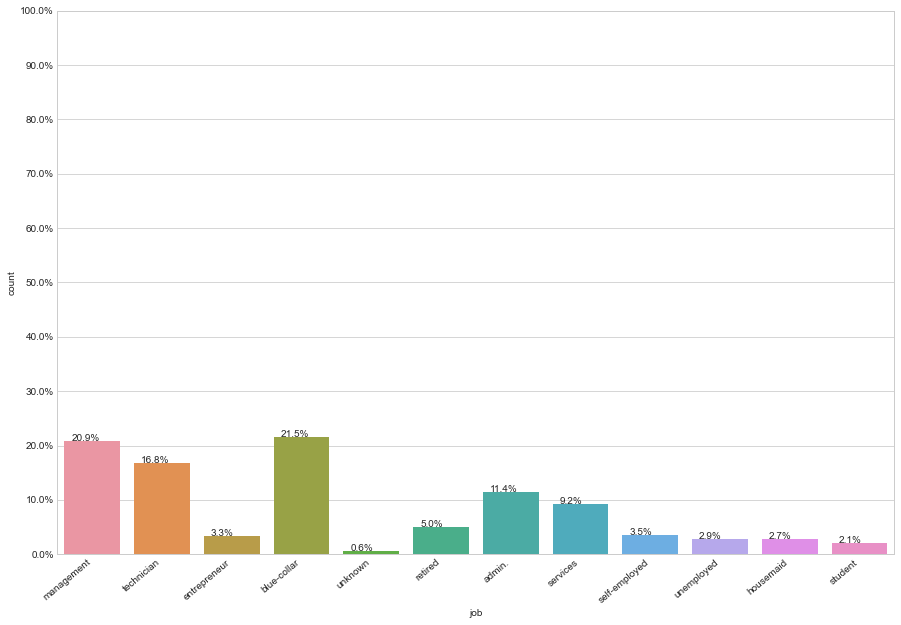

In [9]:
countplot("job", data)

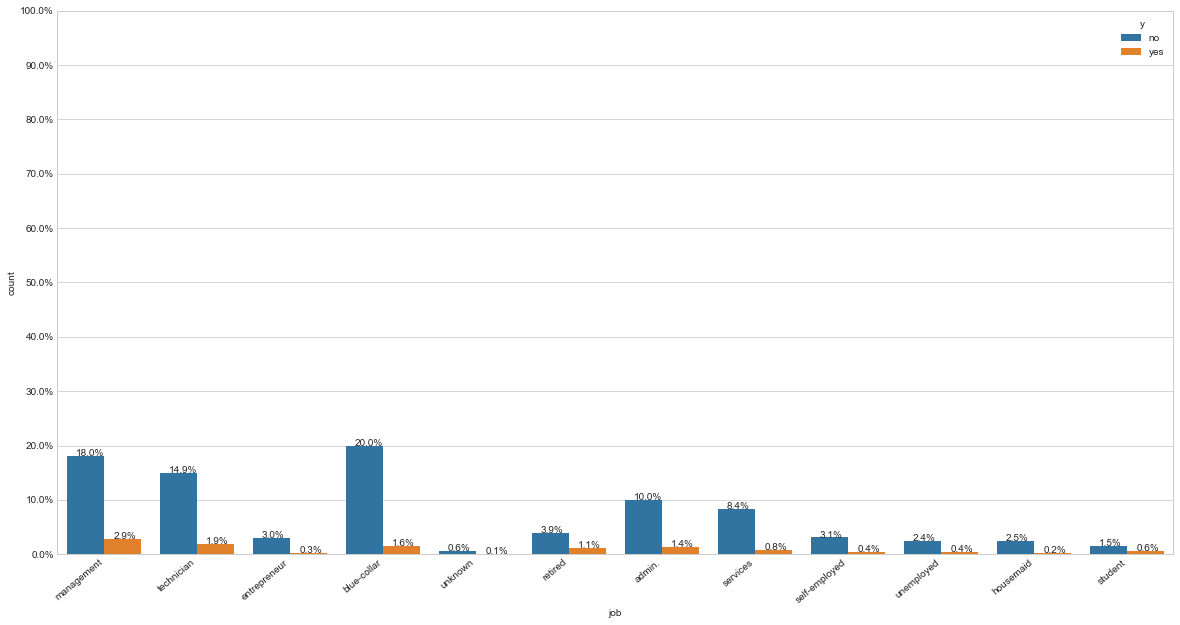

In [10]:
countplot_withY("job", data)

## Feature: Marital (Categorical feature)

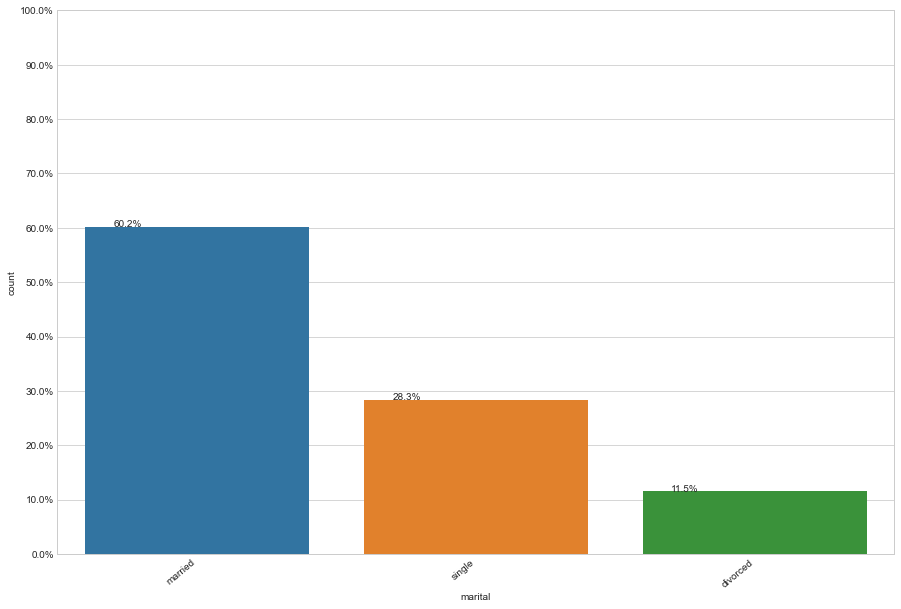

In [11]:
countplot("marital", data)

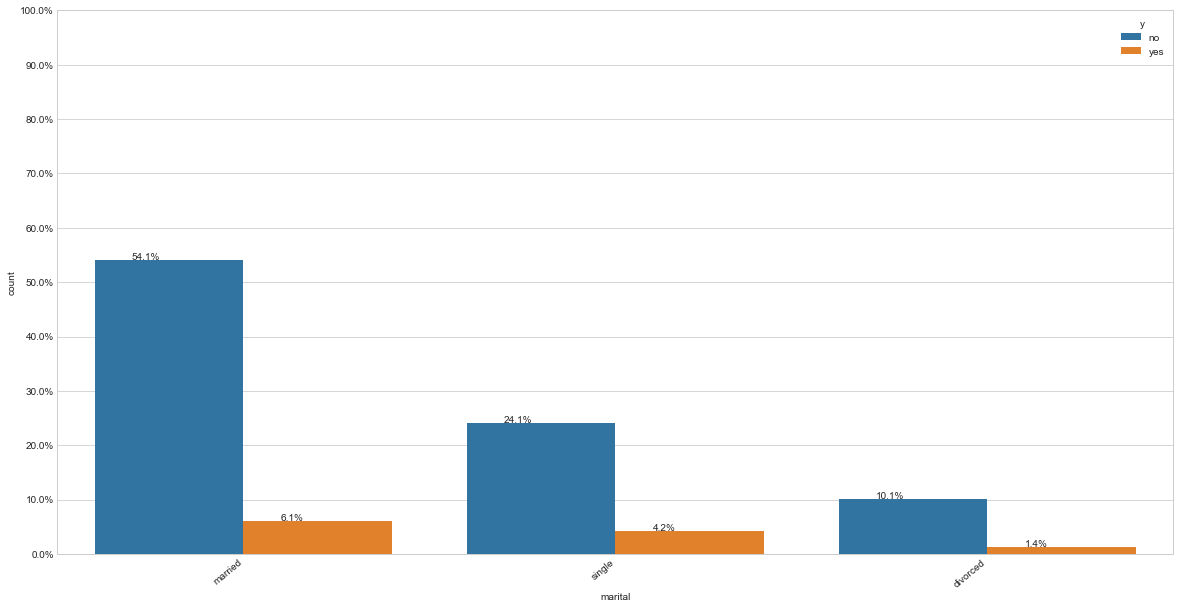

In [12]:
countplot_withY("marital", data)

## Feature: default (categorical)

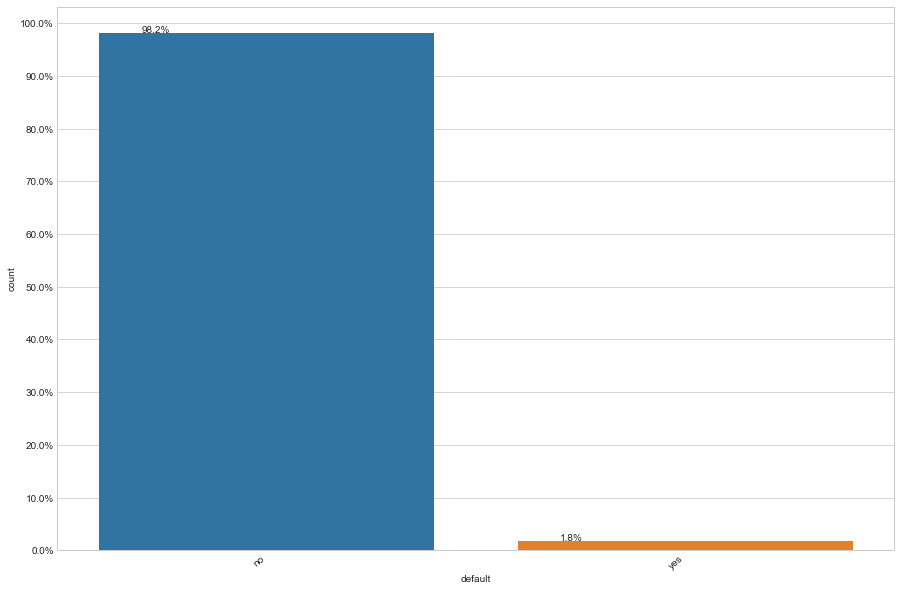

In [13]:
countplot("default", data)

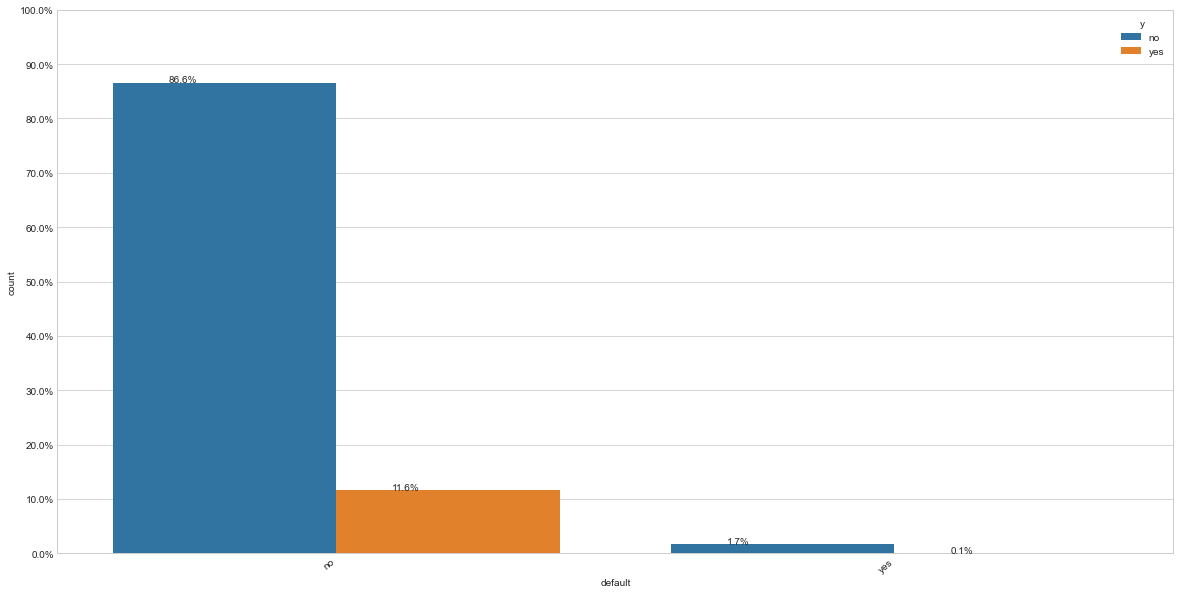

In [14]:
countplot_withY("default", data)

## Feature: Education

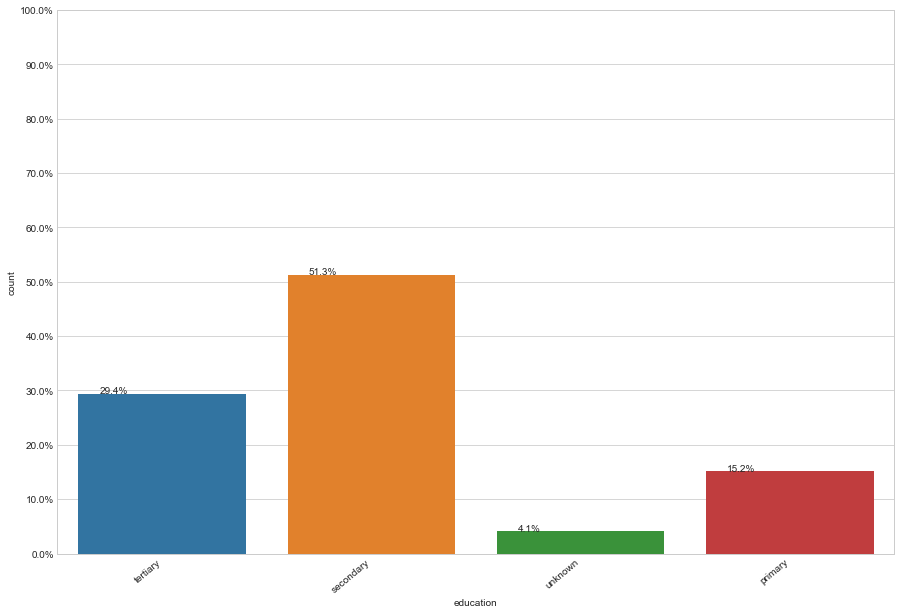

In [15]:
countplot("education",data)

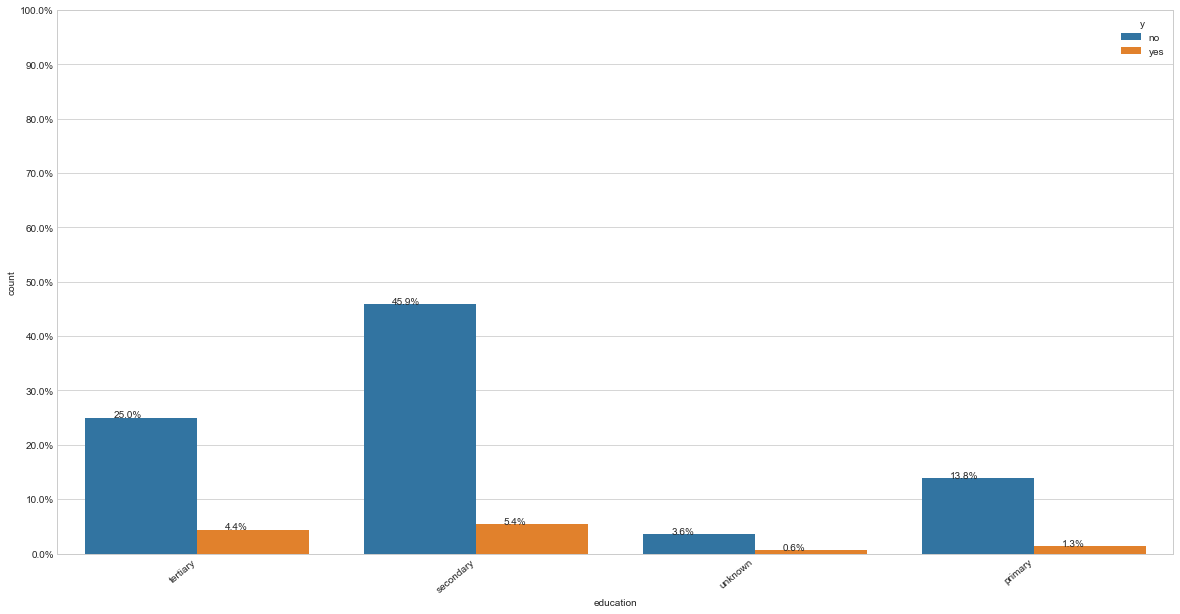

In [16]:
countplot_withY("education", data)

## Feature: housing (Categorical)

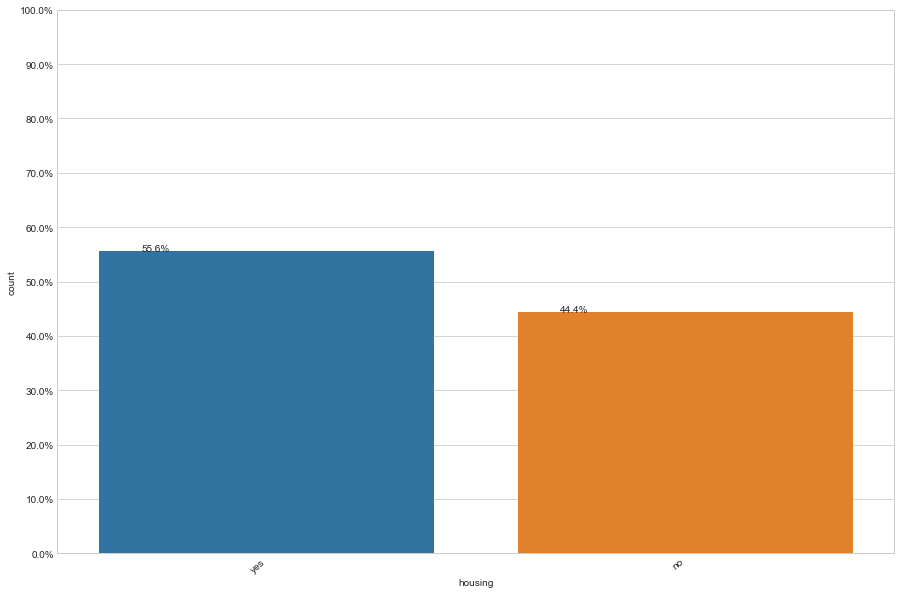

In [17]:
countplot("housing", data)

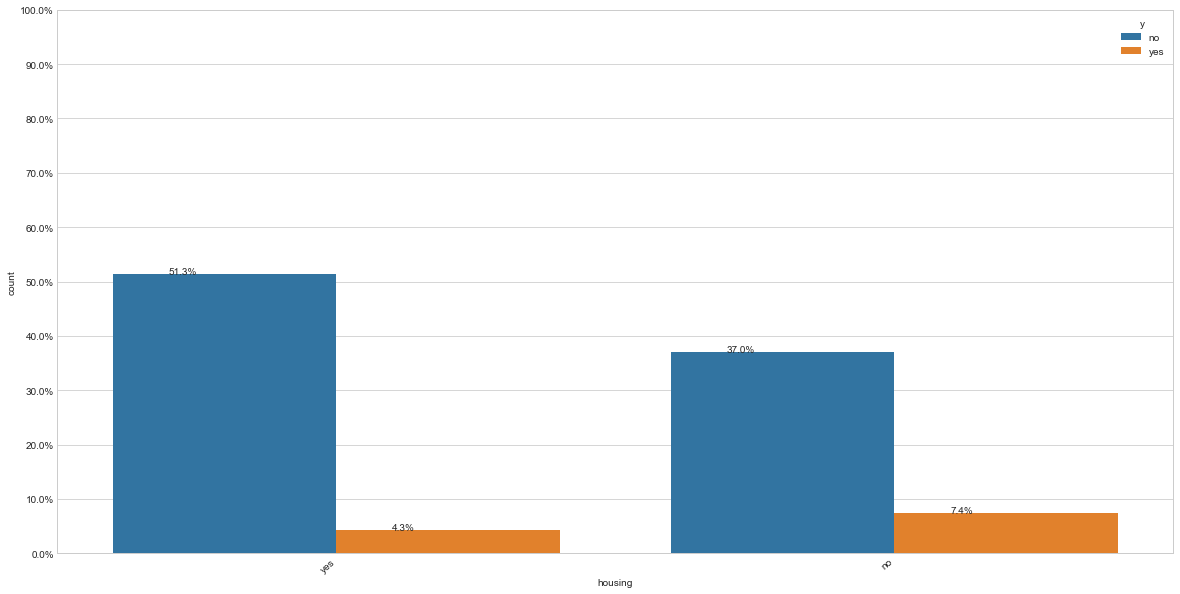

In [18]:
countplot_withY("housing", data)

## Feature: loan (Categorical)

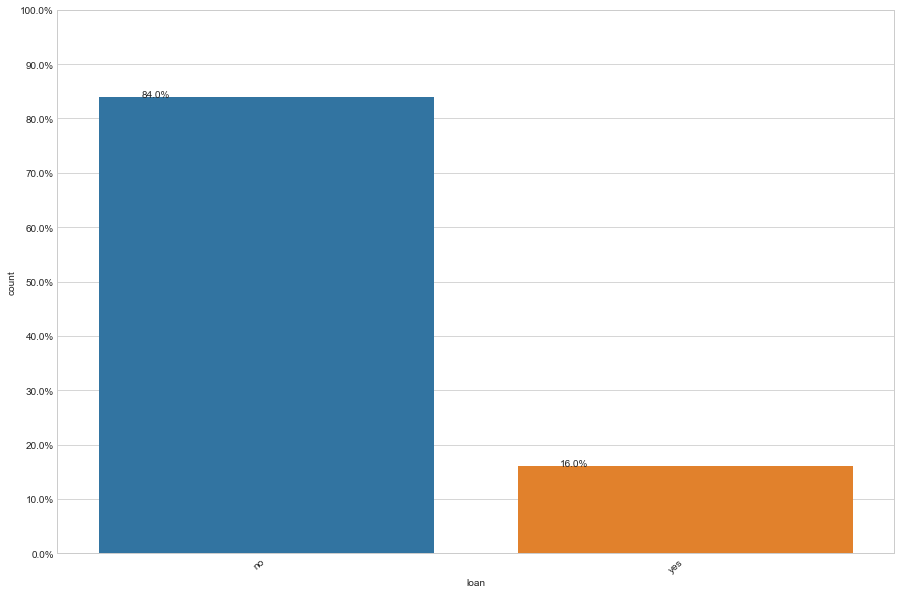

In [19]:
countplot("loan", data)

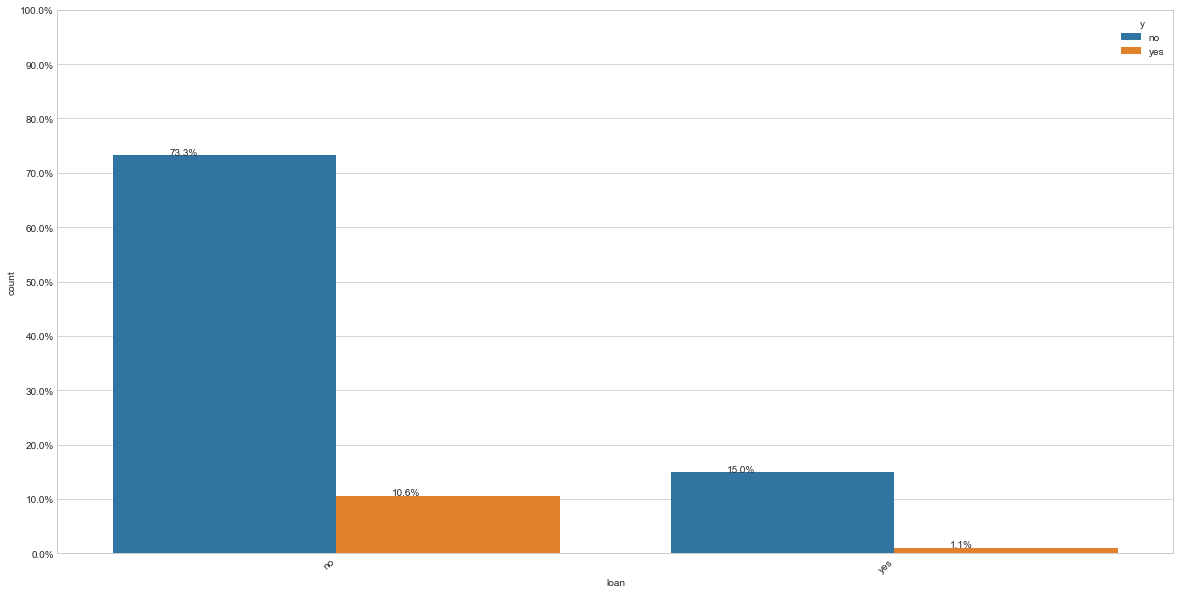

In [20]:
countplot_withY("loan", data)

## Feature: contact (Categorical)

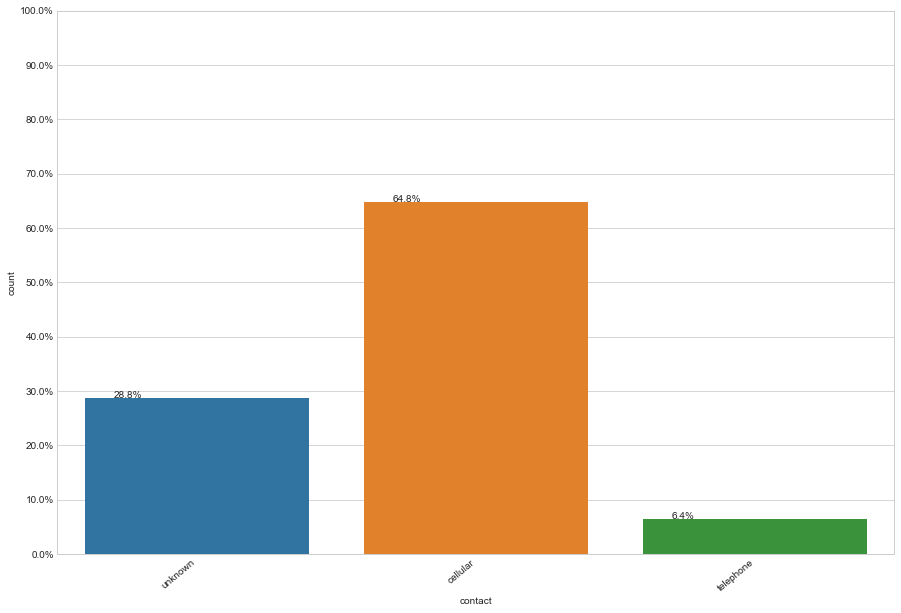

In [21]:
countplot("contact", data)

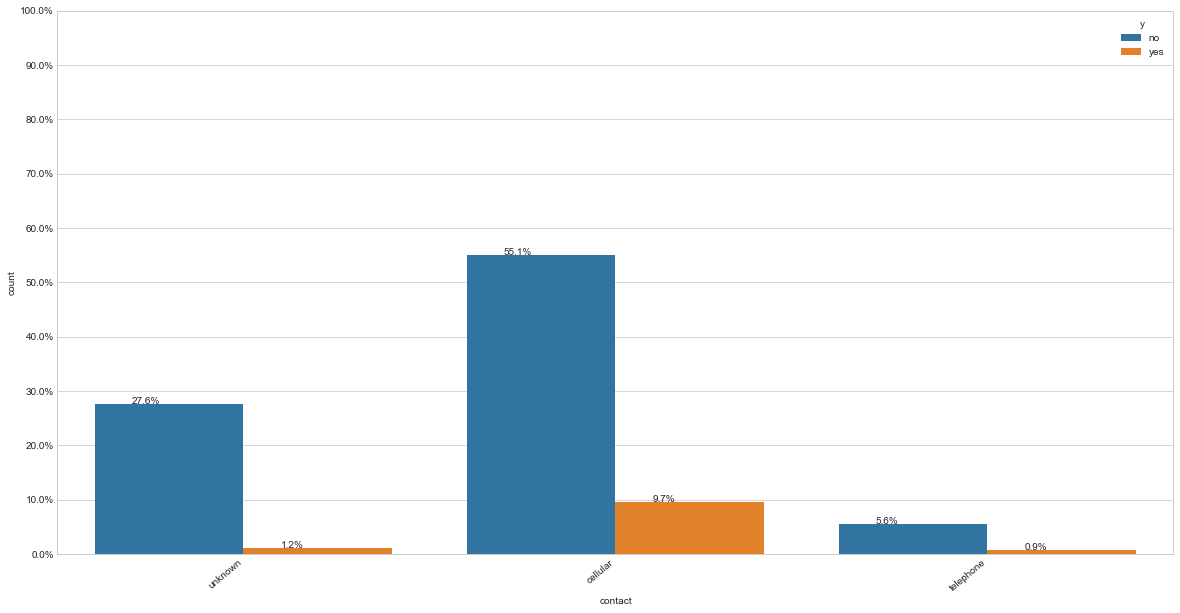

In [22]:
countplot_withY("contact", data)

## Feature: month (Categorical)

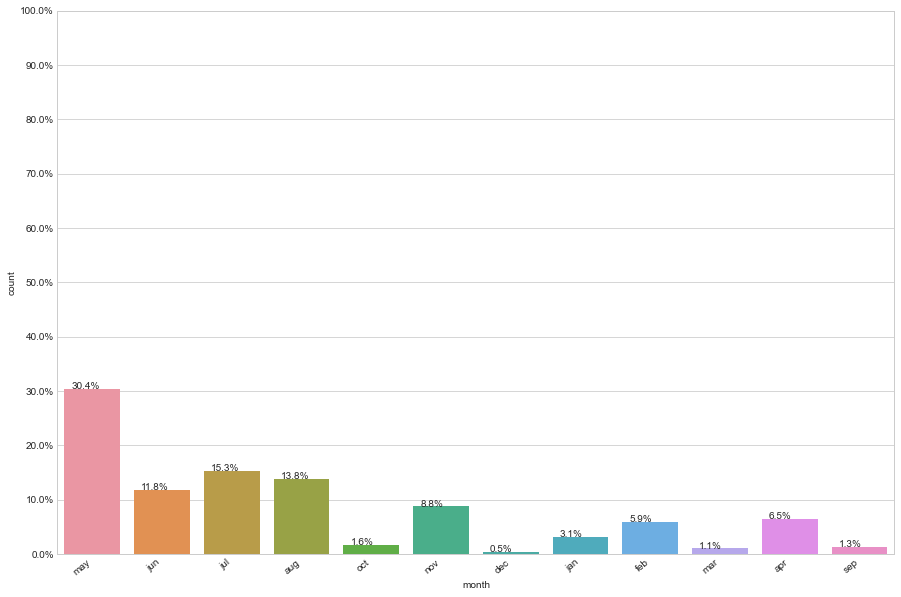

In [23]:
countplot("month", data)

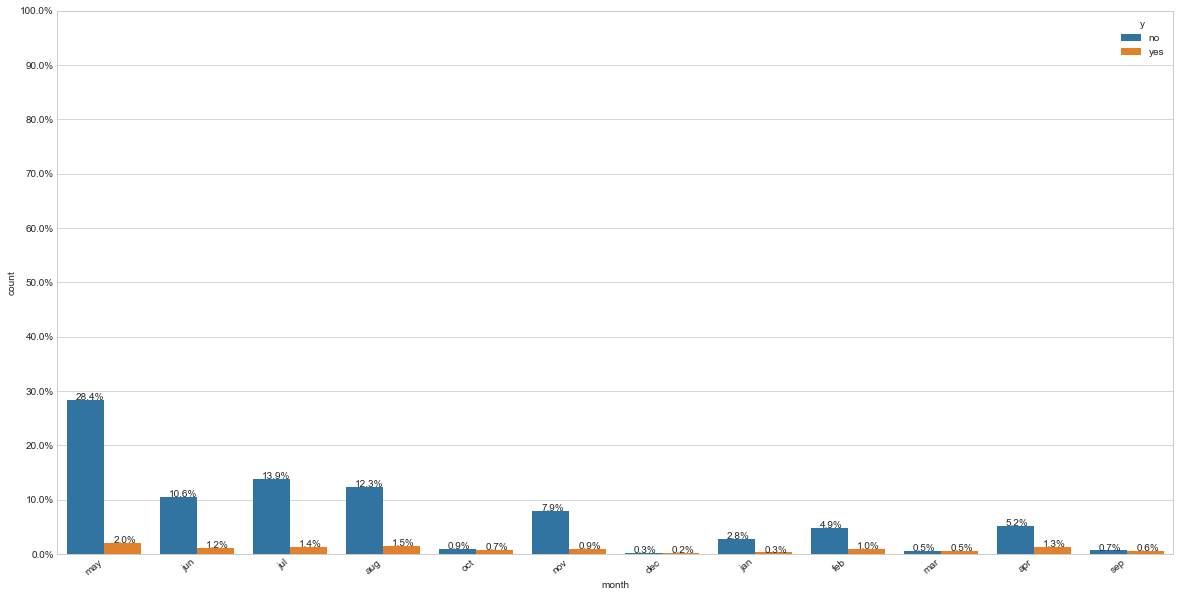

In [24]:
countplot_withY("month", data)

## Feature: poutcome (Categorical)

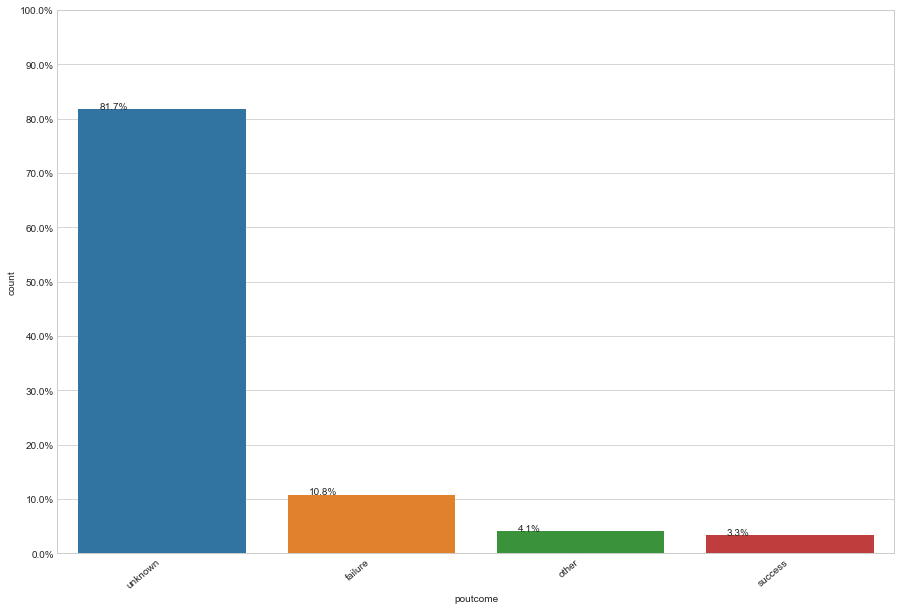

In [25]:
countplot("poutcome", data)

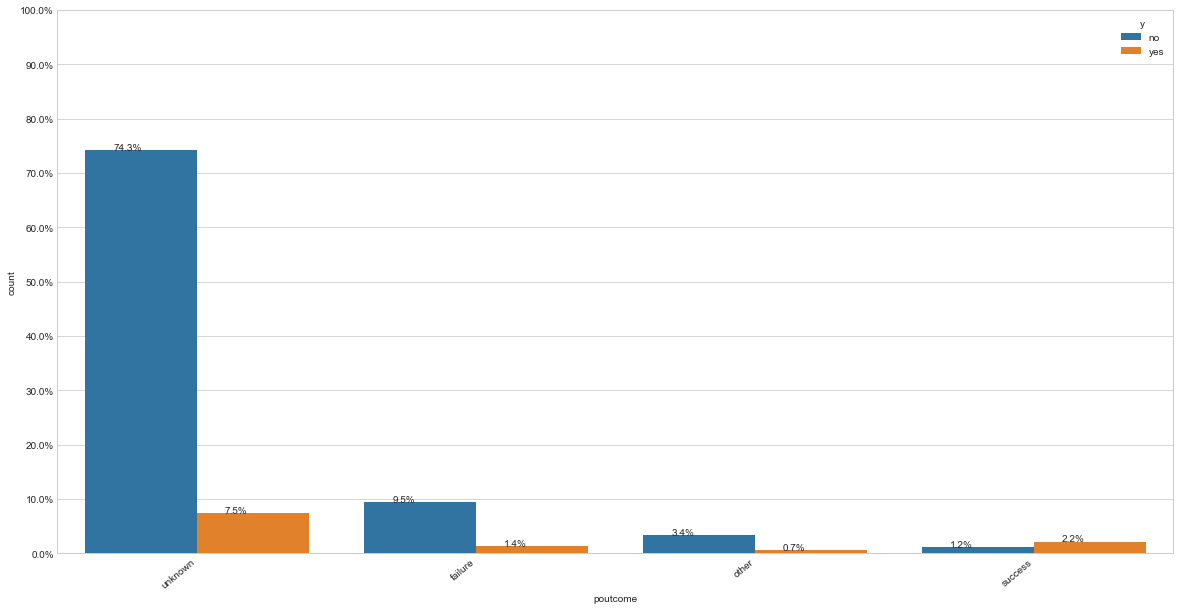

In [26]:
countplot_withY("poutcome", data)

## Feature: Age (Numeric)

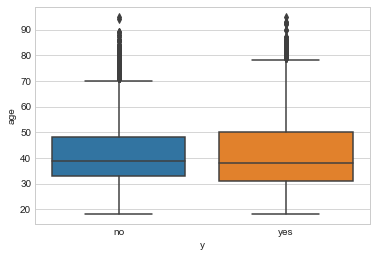

In [27]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="age")
plt.show()

Từ sơ đồ trên, chúng ta biết rằng đối với cả những khách hàng đã đăng ký hoặc không đăng ký một khoản tiền gửi có kỳ hạn, đều có độ tuổi trung bình là khoảng 38-40. Và boxplot cho cả hai lớp trùng nhau khá nhiều, có nghĩa là tuổi tác không nhất thiết là một chỉ báo tốt cho biết khách hàng nào sẽ đăng ký và khách hàng nào sẽ không.

<AxesSubplot:xlabel='age', ylabel='Density'>

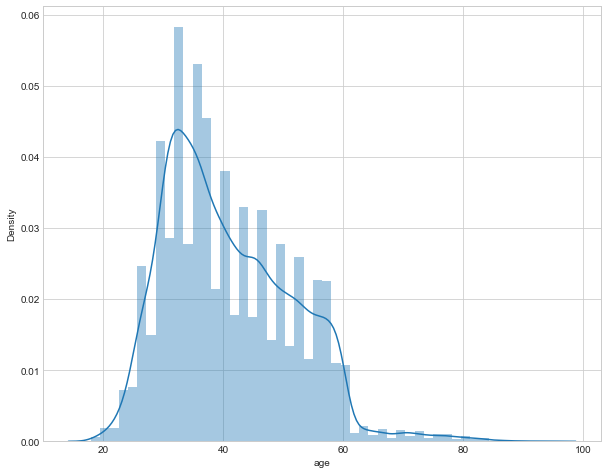

In [28]:
plt.figure(figsize=(10,8))
sns.distplot(data["age"])

Như chúng ta có thể thấy trong bản phân phối ở trên, hầu hết khách hàng ở độ tuổi từ 30-40.

## Feature: campaign (numeric)

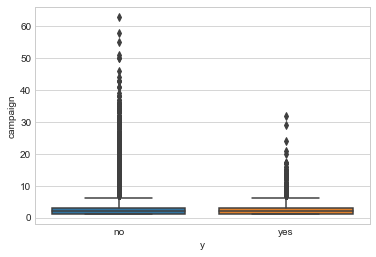

In [29]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="campaign")
plt.show()

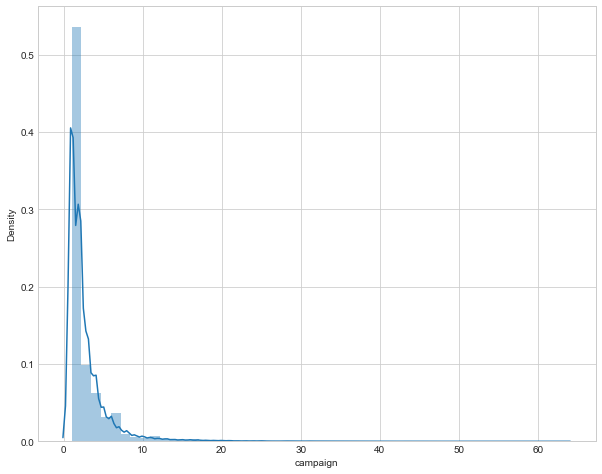

In [30]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["campaign"])
plt.show()

## Feature: pdays (numeric)

In [31]:
data["pdays"].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 465        1
 529        1
 18         1
 434        1
 831        1
Name: pdays, Length: 559, dtype: int64

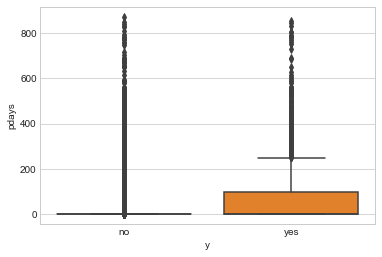

In [32]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="pdays")
plt.show()

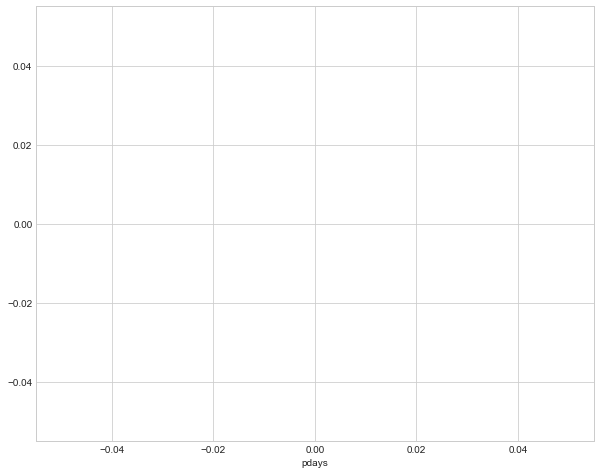

In [33]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data[data["y"]==1]["pdays"])
sns.distplot(data[data["y"]==0]["pdays"])
plt.show()

## Feature: previous (numeric)

In [34]:
data["previous"].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41])

In [35]:
data["previous"].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
27         5
24         5
21         4
29         4
25         4
30         3
26         2
37         2
28         2
38         2
40         1
275        1
51         1
55         1
35         1
32         1
58         1
41         1
Name: previous, dtype: int64

In [36]:
data[data["y"]==1]["previous"].value_counts()

Series([], Name: previous, dtype: int64)

In [37]:
data[data["y"]==0]["previous"].value_counts()

Series([], Name: previous, dtype: int64)

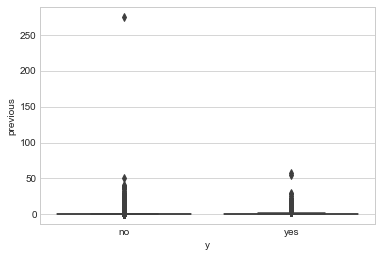

In [38]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="previous")
plt.show()

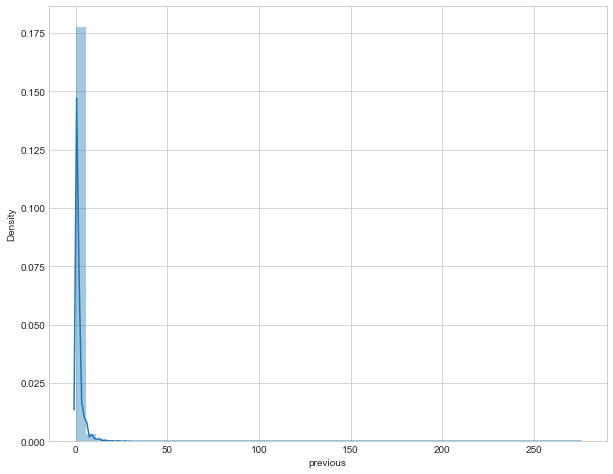

In [39]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["previous"])
plt.show()

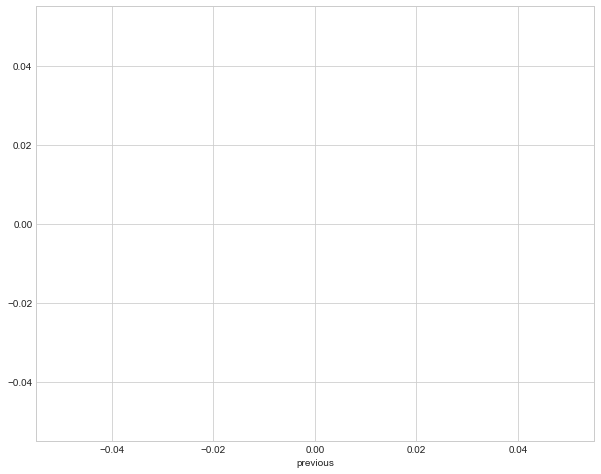

In [40]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data[data["y"]==1]["previous"])
sns.distplot(data[data["y"]==0]["previous"])
plt.show()

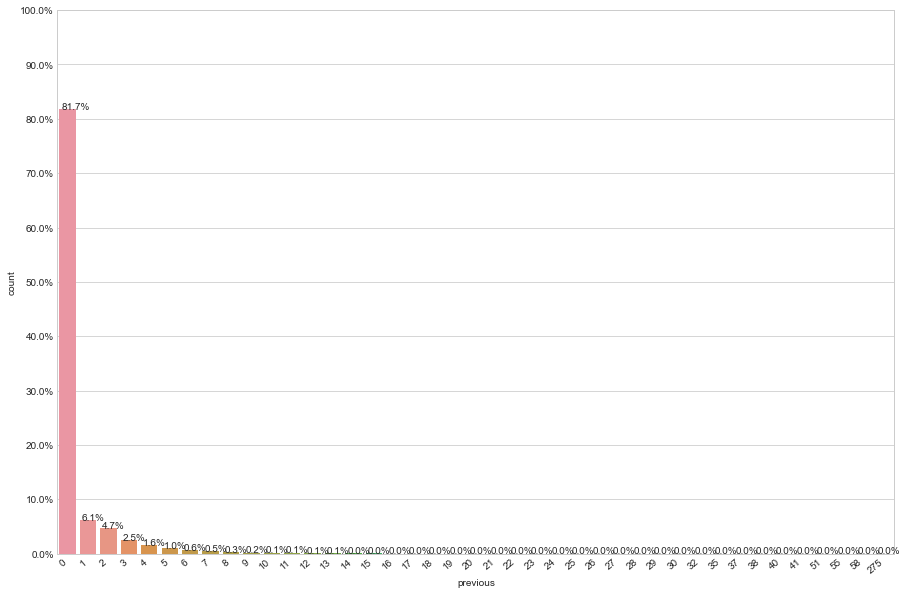

In [41]:
countplot("previous", data)

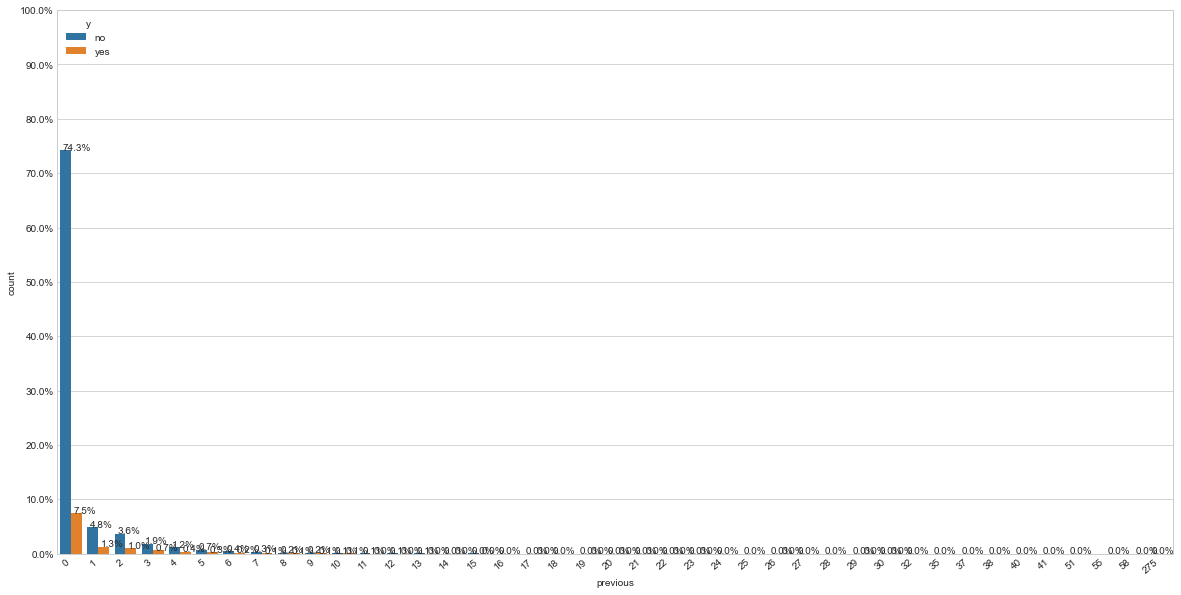

In [42]:
countplot_withY("previous", data)

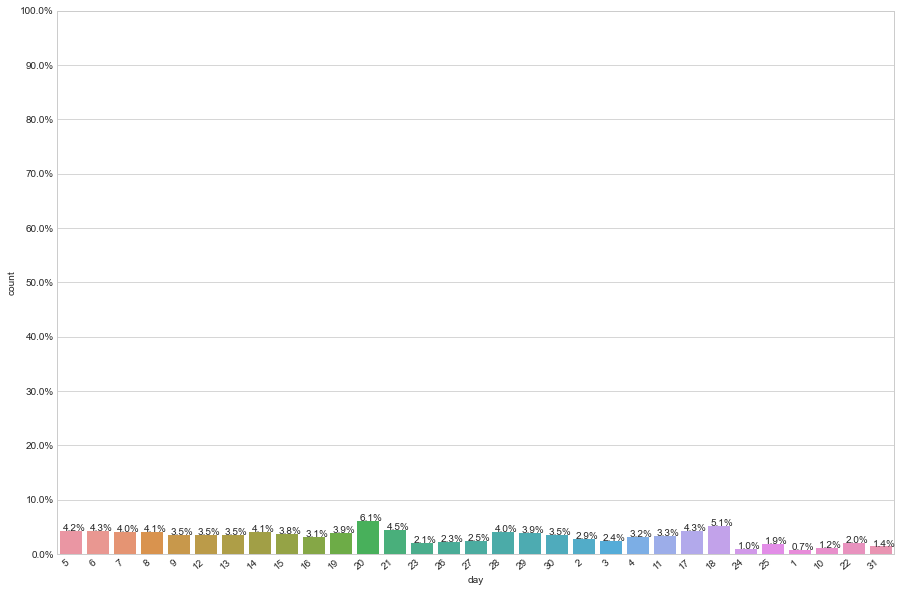

In [43]:
countplot("day", data)

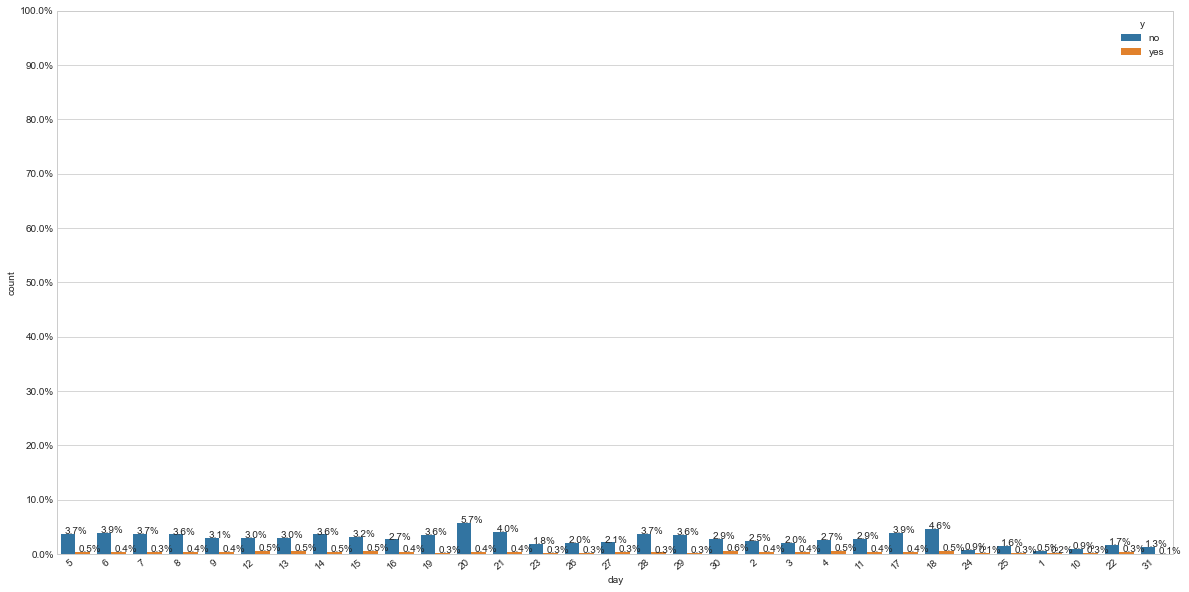

In [44]:
countplot_withY("day", data)

## Data Cleansing

Bỏ biến 'duration' vì giá trị của nó sẽ chỉ được biết khi kết thúc cuộc gọi. Do đó, tại thời điểm đó kết quả của cuộc gọi cũng được biết. Biến 'duration' sẽ dẫn đến rò rỉ dữ liệu và mô hình dự đoán sẽ không thực tế.

In [45]:
data=data.drop(['duration'],axis=1)

In [46]:
# Describing all the Numerical Features
data.describe()

,age,balance,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,2.763841,40.197828,0.580323
std,10.618762,3044.765829,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,63.000000,871.000000,275.000000


In [47]:
# Describing all the Categorical Features
data.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,day,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,31,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,20,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,2752,13766,36959,39922


<AxesSubplot:>

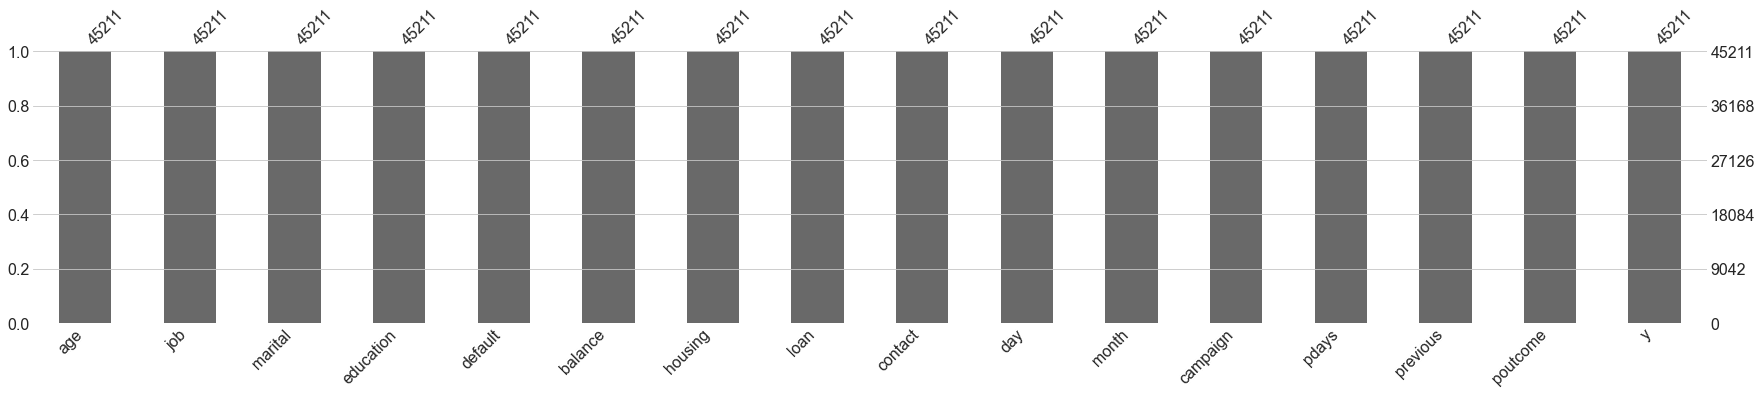

In [48]:
import missingno

missingno.bar(data, sort='ascending', figsize = (30,5))

Tập dữ liệu không có dữ liệu thiếu

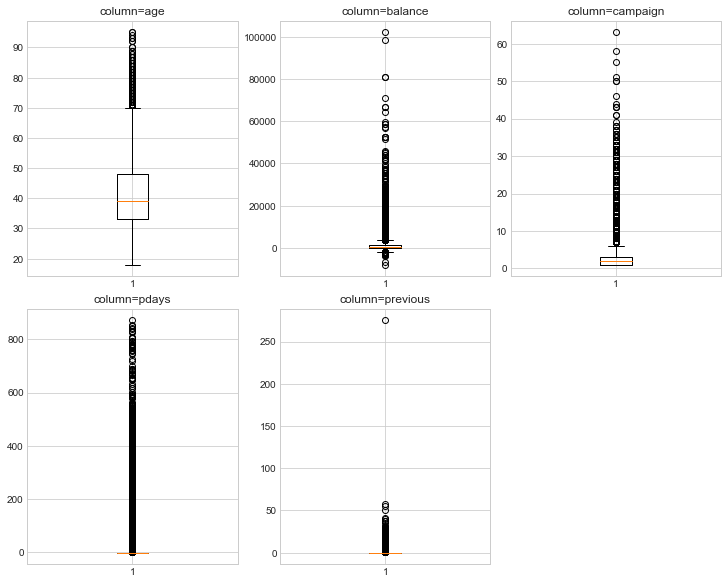

In [49]:
numerical_variables = data.select_dtypes(include=['int64']).columns
figsize = (10, 8)
cols = 3
rows = len(numerical_variables) // cols + 1

def trim_axs(axs, N):
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows, cols)
axs = trim_axs(axs, len(numerical_variables))
for ax, case in zip(axs, numerical_variables):
    ax.set_title('column=%s' % str(case))
    x = data[case]
    ax.boxplot(x)


Các biến có giá trị outlier: "age", "balance", "campaign","pdays","previous".

In [50]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin


def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

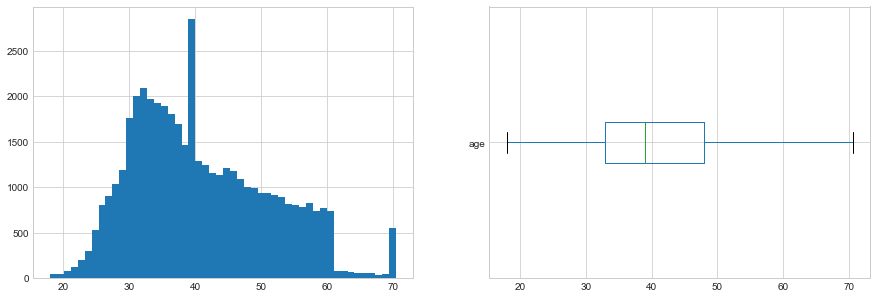

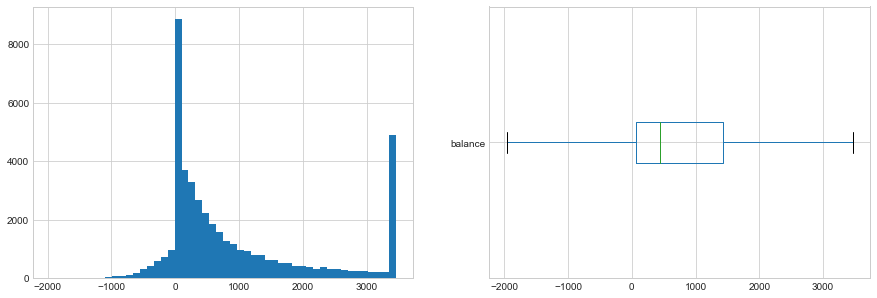

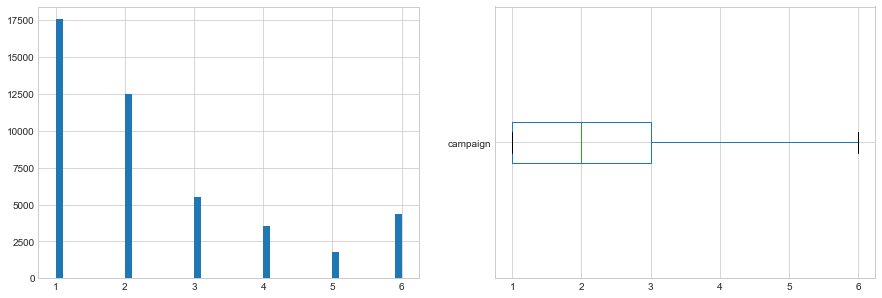

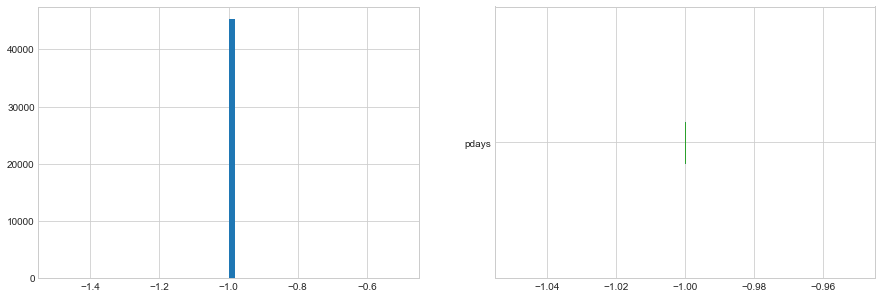

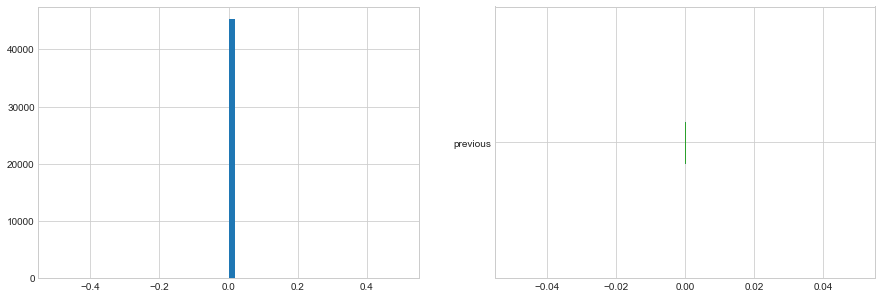

In [51]:
# numerical_variables = data.select_dtypes(include=['int64']).columns
for case in numerical_variables:
    clipped_total_rooms = BoxplotOutlierClipper().fit_transform(data[case])
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    clipped_total_rooms.hist(bins=50, ax=axes[0])
    clipped_total_rooms.to_frame().boxplot(ax=axes[1], vert=False)


In [52]:
# phần "Data Cleansing": giữ lại outlier, đổi outlier về giá trị min/max của boxplot, ta mới vẽ biểu đồ khi đã chuyển outlier, chứ chưa chuyên
# bay giờ ta tiến hành chuyển
for case in numerical_variables:
  data[case] = BoxplotOutlierClipper().fit_transform(data[case])

# cột "pdays" và "previous" chỉ còn lại một giá trị
# nên ta bỏ 2 cột này đi, không đưa vào model
data=data.drop(['pdays'],axis=1)
data=data.drop(['previous'],axis=1)

In [53]:
data['y'] = data['y'].map( {'yes':1, 'no':0} )

In [54]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,poutcome,y
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,unknown,0
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,1,unknown,0
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,unknown,0
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,unknown,0
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,1,unknown,0


Text(0.5, 1.05, 'Pearson correlation of Features')

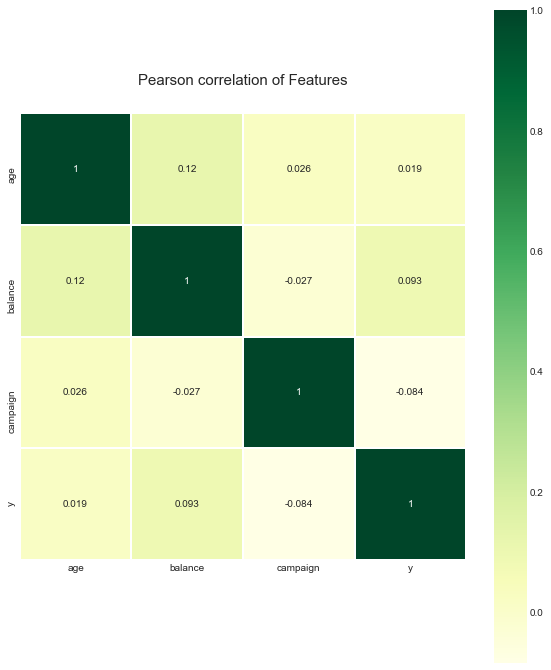

In [55]:
# Idea of correlation matrix of numerical feature: https://medium.com/datadriveninvestor/introduction-to-exploratory-data-analysis-682eb64063ff
%matplotlib inline
corr = data.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

Dữ liệu đa phần tương quan với nhau. \
Nhận xét: do dữ liệu đa phần tương quan đến nhau nên có thể phương pháp phân loại bằng Native Bayes sẽ không hiệu quả.

## Feature Selection (Feature Importance)

## Encoding

In [56]:
# values for category : yes/no
categorcial_variables = ['default','housing', 'loan']
for i in categorcial_variables:
    data[i]
    data[i] = data[i].map( {'yes':1, 'no':0} )
#     data.drop(i, axis=1,inplace = True)


In [57]:
# Convert categorical variables to dummies
data = pd.get_dummies(data=data, columns = ['job', 'marital', 'education','contact', 'month','poutcome'],
                                   prefix = ['job', 'marital', 'education','contact', 'month','poutcome'])
data.head()


,age,default,balance,housing,loan,day,campaign,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,0,2143,1,0,5,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44.0,0,29,1,0,5,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33.0,0,2,1,1,5,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47.0,0,1506,1,0,5,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33.0,0,1,0,0,5,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [58]:
data["day"] = data["day"].astype(int)

## Feature Scaling

Các biến liên 

## Model Building 

In [59]:
data.head()

,age,default,balance,housing,loan,day,campaign,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,0,2143,1,0,5,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44.0,0,29,1,0,5,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33.0,0,2,1,1,5,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47.0,0,1506,1,0,5,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33.0,0,1,0,0,5,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [60]:
# Separate inpedendent and target variables
data_x = data.iloc[:, :-1]
print("Shape of X:", data_x.shape)
data_y = data["y"]
print("Shape of Y:", data_y.shape)

Shape of X: (45211, 45)
Shape of Y: (45211,)


Ta thấy biến Y bị chênh lệch nhiều giữa số lượng dòng "yes" = 5289, "no" = 39922
số lượng dòng "no" gần gấp 7 lần số lượng dòng "yes"
ta sử dụng phương pháp Oversampling để cân bằng dữ liệu

In [61]:
# check version number
import imblearn
print(imblearn.__version__)

# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(data_x, data_y)

# summarize the new class distribution
counter = Counter(y)
print(counter)

0.8.0
Counter({0: 39922, 1: 39922})


In [62]:
# Train Test split
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.4, random_state=50)

print("X Train:", X_train.shape)
# print("X CV:", X_cv.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
# print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)

X Train: (27126, 45)
X Test: (18085, 45)
Y Train: (27126,)
Y Test: (18085,)


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train, y_train)

# predict on train set
log_train_pred = model.predict(X_train)
# predict on test set
log_test_pred = model.predict(X_test)

log_score_train = metrics.roc_auc_score(log_train_pred, y_train)
print("Training AUC score: ",log_score_train)
log_score_train02 = metrics.f1_score(log_train_pred, y_train)
print("Training F1 score: ",log_score_train02)
log_score_test = metrics.roc_auc_score(log_test_pred, y_test)
print("Testing AUC score: ",log_score_test)
log_score_test02 = metrics.f1_score(log_test_pred, y_test)
print("Testing F1 score: ",log_score_test02)

Training AUC score:  0.998757648153145
Training F1 score:  0.9947577442414615
Testing AUC score:  0.9988058320077996
Testing F1 score:  0.9940995987727165


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# train model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# predict on train set
rfc_train_pred = rfc.predict(X_train)
# predict on test set
rfc_test_pred = rfc.predict(X_test)

rfc_score_train = metrics.roc_auc_score(rfc_train_pred, y_train)
print("Training AUC score: ",rfc_score_train)
rfc_score_train02 = metrics.f1_score(rfc_train_pred, y_train)
print("Training F1 score: ",rfc_score_train02)
rfc_score_test = metrics.roc_auc_score(rfc_test_pred, y_test)
print("Testing AUC score: ",rfc_score_test)
rfc_score_test02 = metrics.f1_score(rfc_test_pred, y_test)
print("Testing F1 score: ",rfc_score_test02)

Training AUC score:  1.0
Training F1 score:  1.0
Testing AUC score:  1.0
Testing F1 score:  1.0


In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gboost = GradientBoostingClassifier()
gboost.fit(X_train, y_train)

# predict on train set
gb_train_pred = gboost.predict(X_train)
# predict on test set
gb_test_pred = gboost.predict(X_test)

gb_score_train = metrics.roc_auc_score(gb_train_pred, y_train)
print("Training AUC score: ",gb_score_train)
gb_score_train02 = metrics.f1_score(gb_train_pred, y_train)
print("Training F1 score: ",gb_score_train02)
gb_score_test = metrics.roc_auc_score(gb_test_pred, y_test)
print("Testing AUC score: ",gb_score_test)
gb_score_test02 = metrics.f1_score(gb_test_pred, y_test)
print("Testing F1 score: ",gb_score_test02)

Training AUC score:  1.0
Training F1 score:  1.0
Testing AUC score:  1.0
Testing F1 score:  1.0


In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# predict on train set
knn_train_pred = knn.predict(X_train)
# predict on test set
knn_test_pred = knn.predict(X_test)

knn_score_train = metrics.roc_auc_score(knn_train_pred, y_train)
print("Training AUC score: ",knn_score_train)
knn_score_train02 = metrics.f1_score(knn_train_pred, y_train)
print("Training F1 score: ",knn_score_train02)
knn_score_test = metrics.roc_auc_score(knn_test_pred, y_test)
print("Testing AUC score: ",knn_score_test)
knn_score_test02 = metrics.f1_score(knn_test_pred, y_test)
print("Testing F1 score: ",knn_score_test02)

Training AUC score:  0.8692770645047782
Training F1 score:  0.06630170316301703
Testing AUC score:  0.6884751870138325
Testing F1 score:  0.0326975476839237


## Model Evaluation

| Model  | Train AUC  | Test AUC  | Train F1  | Test F1  |
|---|---|---|---|---|
| Logistic Regression  | 0.998  | 0.9988  | 0.9948| 0.9941  |
| Random Forest  | 1.0  | 1.0  | 1.0  | 1.0  |
| XGBoost  | 1.0  | 1.0  | 1.0  | 1.0  |
| KNN  | 0.8693  | 0.6885  | 0.0663  | 0.0327  |